In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv("insurance.csv").copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.describe(exclude="number")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Langkah #1 - Analisa Descriptive Statistic
---
Kita awali proses analisa ini dengan hal yang paling dasar, yakni merangkum karakter-karakter
berdasarkan data seperti mencari rata-rata & persebaran data. Anda bisa memilih 5 pertanyaan
dibawah ini untuk melakukan eksplorasi data. Beberapa hal yang dapat Anda jawab adalah

1. Rata-rata umur pengguna
2. Rata-rata nilai BMI dari pengguna yang merokok
3. Berapa rata rata umur pada data tersebut?
4. Berapa rata rata nilai BMI dari yang merokok?
5. Apakah variansi dari data charges perokok dan non perokok sama?
6. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?
7. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?
8. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25
9. BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?
10. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [52]:
# Rata-rata nilai BMI dari pengguna yang merokok
smoker = df[df['smoker']=='yes']
non_smoker = df[df['smoker']=='no']

avg_all = np.mean(df['age'])
bmi_s = np.mean(smoker['bmi'])
age_s = np.mean(smoker['age'])

print('Rata-rata nilai BMI dari pengguna yang merokok adalah %.0f tahun, dan Rata-rata umurnya adalah %.0f tahun' % (bmi_s,age_s)) 

Rata-rata nilai BMI dari pengguna yang merokok adalah 31, dan Rata-rata umurnya adalah 39 tahun


In [60]:
# Apakah variansi dari data charges perokok dan non perokok sama?
var_s = np.var(smoker['charges'])
var_ns = np.var(non_smoker['charges'])

mean_s = np.mean(smoker['charges'])
mean_ns = np.mean(non_smoker['charges'])

mean_s_high_bmi = np.mean(smoker[smoker['bmi']>25]['charges'])
mean_ns_high_bmi = np.mean(non_smoker[non_smoker['bmi']>25]['charges'])

bmi_s = np.mean(smoker['bmi'])
bmi_ns = np.mean(non_smoker['bmi'])

print('Rata-rata angka BMI dari pengguna yang merokok adalah %.1f, sedangkan yang tidak merokok adalah %.1f tahun' % (bmi_s,bmi_ns))
print()
print('Variansi data tagihan pengguna yang merokok adalah %.0f, sedangkan yang tidak merokok adalah %.0f' % (var_s,var_ns))
print()
print('Rata-rata tagihan kesahatan perokok dengan BMI diatas 25 adalah %.0f, lebih tinggi dari yang tidak merokok yaitu %.0f' % (mean_s_high_bmi,mean_ns_high_bmi))

Rata-rata angka BMI dari pengguna yang merokok adalah 30.7, sedangkan yang tidak merokok adalah 30.7 tahun

Variansi data tagihan pengguna yang merokok adalah 132721153, sedangkan yang tidak merokok adalah 35891656

Rata-rata tagihan kesahatan perokok dengan BMI diatas 25 adalah 35117, lebih tinggi dari yang tidak merokok yaitu 8630


In [62]:
# Apakah rata rata umur perempuan dan laki-laki yang merokok sama?
avg_age_m = smoker[smoker['sex']=='male']['age'].mean()
avg_age_f = smoker[smoker['sex']=='female']['age'].mean()

avg_bmi_m_all = df[df['sex']=='male']['bmi'].mean()
avg_bmi_f_all = df[df['sex']=='female']['bmi'].mean()

print('Rata-rata umur pengguna perempuan yang merokok adalah %.1f tahun, sedangkan pengguna laki-laki perokok adalah %.1f tahun' % (avg_age_f,avg_age_m))
print()
print('Rata-rata angka BMI dari pengguna perempuan yang merokok adalah %.1f, lebih rendah dari yang laki-laki, yaitu %.1f' % (avg_bmi_f_all,avg_bmi_m_all))
print()

Rata-rata umur pengguna perempuan yang merokok adalah 38.6 tahun, sedangkan pengguna laki-laki perokok adalah 38.4 tahun

Rata-rata angka BMI dari pengguna perempuan yang merokok adalah 30.4, lebih rendah dari yang laki-laki, yaitu 30.9



Langkah #2 - Analisa Variabel Kategorik (PMF)
---
Selanjutnya, untuk memperdalam analisa, Anda dapat mengidentifikasi peluang kondisi tertentu
yang berpotensi memiliki besaran tagihan kesehatan tertentu. Anda bisa memilih 5 pertanyaan
dibawah ini untuk pengecekan kondisi pada data. Beberapa hal yang dapat Anda jawab adalah

1. Gender mana yang memiliki tagihan paling tinggi?
2. Distribusi peluang tagihan di tiap-tiap region
3. Apakah setiap region memiliki proporsi data banyak orang yang sama?
4. Mana yang lebih tinggi proporsi perokok atau non perokok?
5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

In [72]:
# Gender mana yang memiliki tagihan paling tinggi?
# Distribusi peluang tagihan di tiap-tiap region

charge_by_region = pd.DataFrame(df.groupby('region')['charges'].sum().reset_index())

charge_by_region['percentage']=charge_by_region['charges']/(charge_by_region['charges'].sum())

charge_by_sex = pd.DataFrame(df.groupby('sex')['charges'].sum().reset_index().sort_values(by=['charges'],ascending=False))

charge_by_sex['percentage']=charge_by_sex['charges']/(charge_by_sex['charges'].sum())

# Apakah setiap region memiliki proporsi data banyak orang yang sama?

user_by_region = pd.DataFrame(df.groupby('region')['charges'].count().reset_index().rename(columns={'charges':'user'}))

user_by_region['percentage']=user_by_region['user']/df.shape[0]


In [73]:
user_by_region

,region,user,percentage
0,northeast,324,0.242152
1,northwest,325,0.242900
2,southeast,364,0.272048
3,southwest,325,0.242900


In [74]:
charge_by_region

,region,charges,percentage
0,northeast,4.343669e+06,0.244633
1,northwest,4.035712e+06,0.227289
2,southeast,5.363690e+06,0.302081
3,southwest,4.012755e+06,0.225997


In [75]:
charge_by_sex

,sex,charges,percentage
1,male,9.434764e+06,0.531362
0,female,8.321061e+06,0.468638


In [15]:
# Mana yang lebih tinggi proporsi perokok atau non perokok?
p_smoker = len(smoker)/len(df)
p_non_smoker = len(non_smoker)/len(df)


In [16]:
p_non_smoker

0.7952167414050823

In [17]:
p_smoker

0.20478325859491778

In [18]:
# Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

# Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

smoker_sex = df.groupby(['smoker','sex'])['charges'].count().reset_index()

sample_space = smoker_sex.iloc[:,-1].sum()

smoker = smoker_sex[smoker_sex['smoker'] == 'yes'].iloc[:,-1].sum()

femme_smoker = smoker_sex[(smoker_sex['sex'] == 'female')&(smoker_sex['smoker'] == 'yes')].iloc[:,-1].sum()

male_smoker = smoker_sex[(smoker_sex['sex'] == 'male')&(smoker_sex['smoker'] == 'yes')].iloc[:,-1].sum()

p_femme_smoker = femme_smoker/smoker
p_male_smoker = male_smoker/smoker

In [19]:
p_femme_smoker

0.4197080291970803

In [20]:
p_male_smoker

0.5802919708029197

Langkah #3 - Analisa Variabel Kontinu
---
Variabel dalam data yang kita punya tidak semuanya berbentuk kategorik, untuk memahami
kemungkinan kondisi variabel bernilai kontinu terhadap tagihan kesehatan, kita bisa melakukan
analisa pada data tersebut. Anda bisa memilih 2 pertanyaan dibawah ini untuk pengecekan
kondisi pada data.
1. Mana yang lebih mungkin terjadi
    - a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
    - b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k
2. Mana yang lebih mungkin terjadi
    - a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
    - b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

Note: Anda dibebaskan memilih cara untuk menghitung peluang baik menggunakan asumsi distribusi atau
menggunakan pendekatan diskrit (binning interval pada variabel kontinu).

In [21]:
bmi=np.array(df['bmi'])
bmi.mean()
bmi.var()

37.16008997478835

c:\Users\msing\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn-0.11.0-py3.9.egg\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


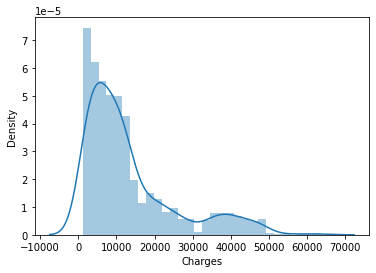

In [22]:
sns.distplot(df['charges'], axlabel='Charges', kde=True)
plt.show()

In [78]:
# 1.a.
# B = BMI > 25
# A = Charge > 16,700
# P(A|B) = P(A & B)/P(B)

sample_space = len(df)

bmi_threshold = 25
P_B = len(df[df['bmi']>bmi_threshold])/sample_space
cond_lower_bmi = df[df['bmi']<bmi_threshold]

charge_threshold = 16700
P_A = len(df[df['charges']>charge_threshold])/sample_space
# P_AnB = P_A*P_B
P_AnB = len(df[(df['charges']>charge_threshold)&(df['bmi']>bmi_threshold)])/sample_space

P_AB = P_AnB/P_B
P_AB

# 1.b.
# B2 = BMI < 25 
# P(B2) = 1-P(B)
# A = Charge > 16,700
# P(A|B2) = P(A & B2)/P(B2)

P_B2 = 1-P_B
P_AnB2 = len(df[(df['charges']>charge_threshold)&(df['bmi']<bmi_threshold)])/sample_space 

P_AB2 = P_AnB2/P_B2

if P_AB>P_AB2:
    print('Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k lebih mungkin terjadi (Skenario A)')
else:
    print('Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k lebih mungkin terjadi (Skenario B)')

Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k(Skenario A)


In [79]:
# - a. Seseorang perokok dengan BMI diatas 25 
# mendapatkan tagihan kesehatan diatas 16.7k, atau

# - b. Seseorang non perokok dengan BMI diatas 25 
# mendapatkan tagihan kesehatan diatas 16.7k

# A = Charge > 16,700
# B = BMI > 25
# C = perokok
P_A = P_A
P_B = P_B
P_AnB = P_AnB
P_AB = P_AnB/P_B
P_C = p_smoker

# P((A|B)|C) = P(A & B & C)/P(B & C)
P_AnBnC = P_AnB * P_C
P_BnC = P_B * P_C
P_ABC = P_AnBnC/P_BnC

# C2 = non-perokok 
# P((A|B)|C2) = P(A & B & C2)/P(B & C2)
P_C2 = 1-P_C
P_AnBnC2 = P_AnB * P_C2
P_BnC2 = P_B * P_C2
P_ABC2 = P_AnBnC2/P_BnC2

if P_ABC>P_ABC2:
    print('Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k (Skenario A)')
elif P_ABC2>P_ABC:
    print('Seseorang non-perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k (Skenario B)')
else:
    print('Skenario A dan Skenario B memiliki peluang sama')

Skenario A dan Skenario B memiliki peluang sama


Langkah #4 - Analisa Korelasi Variabel
---
Setelah menjawab kondisi-kondisi yang lebih mungkin memiliki tagihan kesehatan yang tinggi
dari langkah sebelumnya. Kita juga dapat mencari keterhubungan antara kondisi-kondisi
tersebut dengan tagihan kesehatan. Analisa korelasi akan diperlukan disini. Anda bisa memilih
mengecek korelasi tagihan kesehatan minimal dengan 2 variabel lainnya.

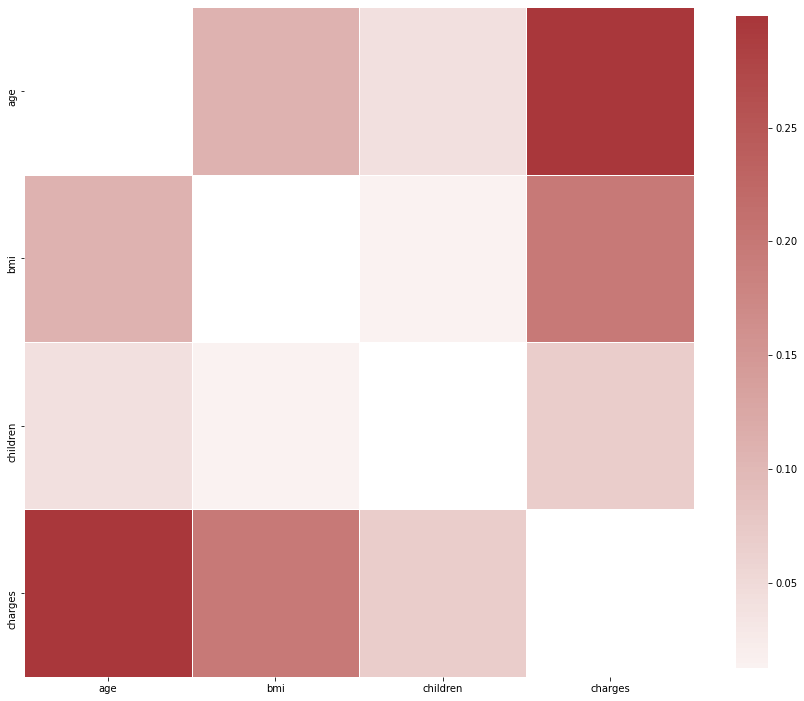

In [27]:
# Computes feature correlation
df_corr = df.corr()

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, fmt='', linewidths=1,
            cmap="vlag", cbar_kws={"shrink": 0.8});

Langkah #5 - Pengujian Hipotesis
---
Langkah terakhir, kita cari apakah ada bukti statistik yang cukup terhadap klaim atau hipotesis
tentang tagihan kesehatan. Anda bisa mengecek 3 hipotesis tentang karakter populasi dari
data. Hipotesis bisa anda pilih adalah
1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
2. Proporsi perokok laki laki lebih besar dari perempuan
3. Variansi tagihan kesehatan perokok dan non perokok sama
4. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan
dengan BMI dibawah 25
5. Tagihan kesehatan laki-laki lebih besar dari perempuan

$$H_0: \mu_{smoker} >= \mu_{non-smoker}$$
$$H_1: \mu_{smoker} < \mu_{non-smoker}$$

In [39]:
# 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
smoker = np.array(df[df['smoker']=='yes']['charges'])
non_smoker = np.array(df[df['smoker']=='no']['charges'])
alpha = 0.05

from scipy.stats import ttest_ind

stat, p = ttest_ind(a = smoker, b = non_smoker, equal_var=False, alternative='less')

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Statistics = 32.7519, p-value = 1.0000
Two group means are equal (Gagal tolak H0)


In [41]:
# 2. Proporsi perokok laki laki lebih besar dari perempuan
# H0 = P_1 <= P_2
# Ha = P_1 > P_2
x_1 = male_smoker
x_2 = femme_smoker

femme = len(df[df['sex'] == 'female'])
male = len(df[df['sex'] == 'male'])

n_1 = male
n_2 = femme

P_1 = male_smoker/male
P_2 = femme_smoker/femme

P_hat = (x_1+x_2)/(n_1+n_2)
z = (P_1-P_2)/np.sqrt(P_hat*(1-P_hat)*((1/n_1)+(1/n_2)))

#find Z critical value
alpha = .05
z_crit = scipy.stats.norm.ppf(1-alpha)

# find P Value
P_value = scipy.stats.norm.sf(abs(z))

#tolak H0

$$H_0: \mu_{male} >= \mu_{female}$$
$$H_1: \mu_{male} < \mu_{female}$$

167998626.43422312

In [48]:
# 5. Tagihan kesehatan laki-laki lebih besar dari perempuan
alpha = 0.05

femme = np.array(df[df['sex'] == 'female']['charges'])
male = np.array(df[df['sex'] == 'male']['charges'])
if male.var()!=femme.var():
    stat, p = ttest_ind(a = male, b = femme, equal_var=False, alternative='less')

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Statistics = 2.1009, p-value = 0.9821
Two group means are equal (Gagal tolak H0)
